In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lakeview as lv

In [2]:
CHROMOSOME = "17"
ILLUMINA_BAM_PATH = "../../data/SKBR3_Illumina_550bp_pcrFREE.bam"

painter = lv.SequenceAlignment.from_file(
    ILLUMINA_BAM_PATH, region=CHROMOSOME
)

(0.0, 1.0, 0.0, 1.0)

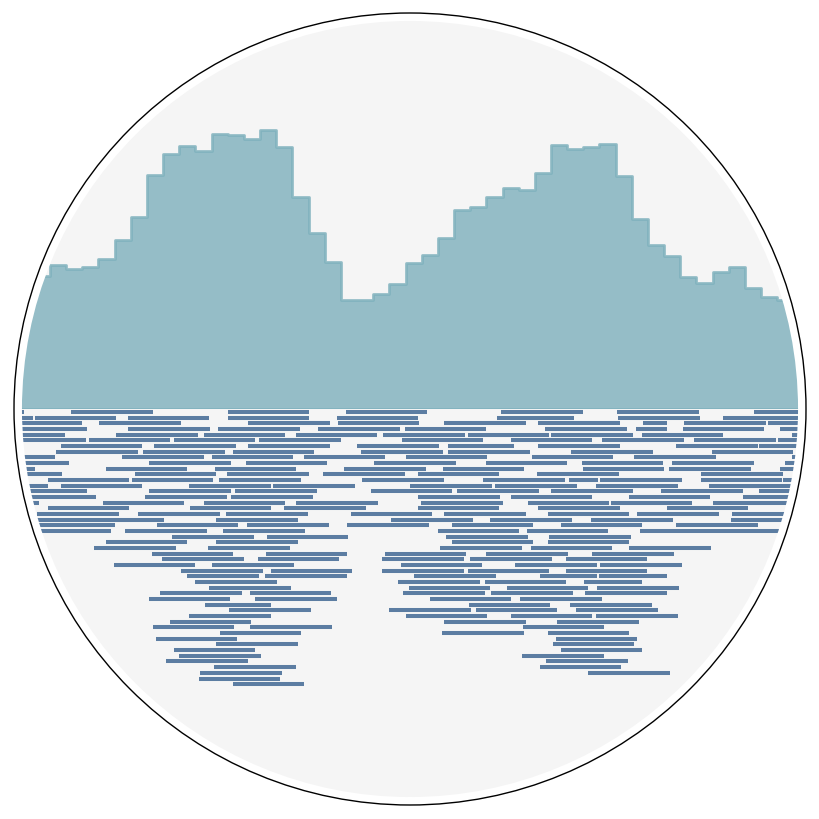

In [75]:
SKY_COLOR = "whitesmoke"
PILEUP_FACECOLOR = (125/255, 176/255, 188/255)
#PILEUP_FACECOLOR = (175/255, 218/255, 210/255)
#PILEUP_FACECOLOR = (92/255, 125/255, 162/255)

PILEUP_EDGECOLOR = (125/255, 176/255, 188/255)
PILEUP_HATCH = ".."

SEGMENT_COLOR = (92/255, 125/255, 162/255)
#SEGMENT_COLOR = "lightgray"

LAKE_COLOR = "whitesmoke"

xlim = (6.404e7 + 2950, 6.404e7 + 3940)
rng = np.random.default_rng(4)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes((0, 0.5, 1, 0.5))
ax1.set_facecolor(SKY_COLOR)
ax2 = fig.add_axes((0, 0, 1, 0.5))
ax2.set_facecolor(LAKE_COLOR)
ax3 = fig.add_axes((0, 0, 1, 1))


painter.draw_pileup(
    ax1,
    window_size=20,
    show_mismatches=False,
    pileup_kw=dict(
        facecolor=PILEUP_FACECOLOR,
        edgecolor=PILEUP_EDGECOLOR,
        linewidth=2,
        alpha=0.8,
    ),
)
painter.draw_alignment(
    ax2,
    sort_by=lambda __: rng.random(),
    filter_by=lambda __: rng.random() < 0.5,
    color_by=lambda __: SEGMENT_COLOR,
    show_arrowheads=False,
    show_mismatches=False,
    show_insertions=False,
    show_deletions=False,
    show_soft_clippings=False,
    show_hard_clippings=False,
    height=2.9,
    min_spacing=0,
)
circle1 = plt.Circle(
    (0.5, 0.5), radius=0.495, transform=ax3.transAxes, ec="k", fc="none", zorder=1
)
circle2 = plt.Circle(
    (0.5, 0.5),
    radius=0.65,
    transform=ax3.transAxes,
    ec="w",
    fc="none",
    lw=190,
    zorder=0,
)
ax3.add_patch(circle1)
ax3.add_patch(circle2)

h = 0.35
rect1 = plt.Rectangle((0, 0.5 - h), width=1, height=2 * h, ec="k", fc="none")


ax1.set_xlim(xlim)
ax1.set_ylim(0, 102)

ax2.set_xlim(xlim)
ax2.set_ylim(70, -0.5)


# ax1.axis("off")
for ax in (ax1, ax2):
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ("top", "right", "bottom", "left"):
        ax.spines[spine].set_visible(False)
ax3.axis("off")

#ax3.add_patch(rect1)